## Import Libraries

In [218]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score, confusion_matrix
from xgboost import XGBClassifier

## Import dataset

In [219]:
data = pd.read_csv("Iris.csv", index_col = [0])
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


## Data preprocessing

In [220]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [221]:
label_enc = LabelEncoder()
data_label_encoded = data.copy()
data_label_encoded["Species"] = label_enc.fit_transform(data_label_encoded["Species"])

## EDA

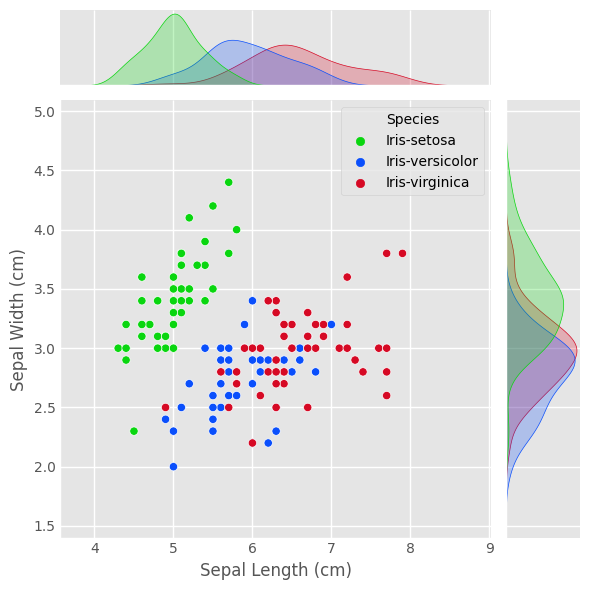

In [222]:
plt.style.use("ggplot")
sns.jointplot(x = "SepalLengthCm", y = "SepalWidthCm", data = data, hue = "Species", palette = ["#09d60f", "#0a4ffc", "#d60924"])
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)");

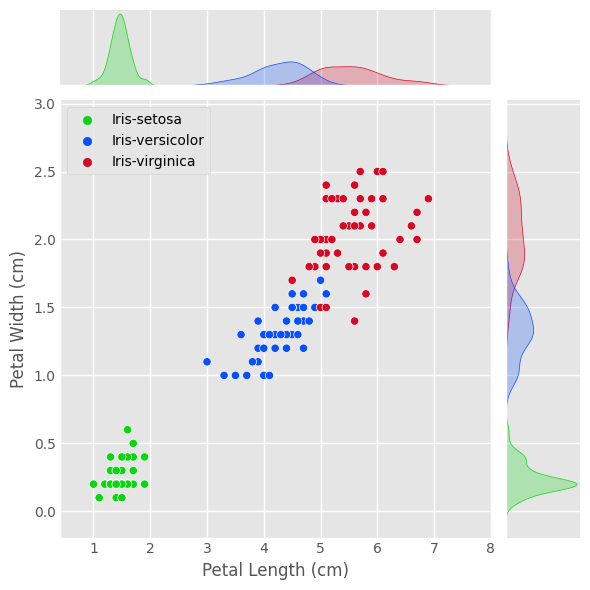

In [223]:
sns.jointplot(x = "PetalLengthCm", y = "PetalWidthCm", data = data, hue = "Species", palette = ["#09d60f", "#0a4ffc", "#d60924"])
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend(loc = 2);

## Train and Test set split

In [224]:
X = data_label_encoded.iloc[:, :-1].values
y = data_label_encoded.iloc[:, -1].values

X.shape, y.shape

((150, 4), (150,))

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## Modelling Experiments

### Model performance function

In [226]:
def get_model_performance(model, X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    model_performance = {
            'accuracy' : np.round(accuracy_score(y_test, y_pred), 3),
            'recall' : np.round(recall_score(y_test, y_pred, average = 'micro'), 3),
            'precision': np.round(precision_score(y_test, y_pred, average = 'micro'), 3),
            'f1': np.round(f1_score(y_test, y_pred, average = 'micro'), 3),
            "confusion_matrix": confusion_matrix(y_test, y_pred)
        }
    
    try:
        model_performance.update(auc_score = np.round(roc_auc_score(y_test, model.predict_proba(X_test), average = 'micro', multi_class = 'ovr'), 3))
    except Exception as e:
        pass
    return model_performance

### Model1: Logistic Regression

In [227]:
log_reg = LogisticRegression(multi_class = 'multinomial')
get_model_performance(model = log_reg)

{'accuracy': 0.967,
 'recall': 0.967,
 'precision': 0.967,
 'f1': 0.967,
 'confusion_matrix': array([[11,  0,  0],
        [ 0, 12,  1],
        [ 0,  0,  6]], dtype=int64),
 'auc_score': 0.999}

### Model2: Decision Tree Classifier

In [228]:
dtree = DecisionTreeClassifier()
get_model_performance(model = dtree)

{'accuracy': 0.967,
 'recall': 0.967,
 'precision': 0.967,
 'f1': 0.967,
 'confusion_matrix': array([[11,  0,  0],
        [ 0, 12,  1],
        [ 0,  0,  6]], dtype=int64),
 'auc_score': 0.975}

### Model3: Random Forest Classifier

In [229]:
rdf = RandomForestClassifier()
get_model_performance(model = rdf)

{'accuracy': 0.967,
 'recall': 0.967,
 'precision': 0.967,
 'f1': 0.967,
 'confusion_matrix': array([[11,  0,  0],
        [ 0, 12,  1],
        [ 0,  0,  6]], dtype=int64),
 'auc_score': 0.992}

### Model4: Supprt Vector Machine (linear kernel)

In [230]:
svc = SVC(kernel = 'linear')
get_model_performance(model = svc)

{'accuracy': 1.0,
 'recall': 1.0,
 'precision': 1.0,
 'f1': 1.0,
 'confusion_matrix': array([[11,  0,  0],
        [ 0, 13,  0],
        [ 0,  0,  6]], dtype=int64)}

### Model5: XGBoost

In [231]:
xgb = XGBClassifier(subsample = 0.8)
get_model_performance(model = xgb)

{'accuracy': 0.967,
 'recall': 0.967,
 'precision': 0.967,
 'f1': 0.967,
 'confusion_matrix': array([[11,  0,  0],
        [ 0, 12,  1],
        [ 0,  0,  6]], dtype=int64),
 'auc_score': 0.953}

### Model6: Gradient Boosting

In [232]:
gdb = GradientBoostingClassifier(n_estimators = 50, learning_rate=0.1, subsample = 0.8, max_depth=5)
get_model_performance(model = gdb)

{'accuracy': 0.967,
 'recall': 0.967,
 'precision': 0.967,
 'f1': 0.967,
 'confusion_matrix': array([[11,  0,  0],
        [ 0, 12,  1],
        [ 0,  0,  6]], dtype=int64),
 'auc_score': 0.951}

## Model Performance Data

In [233]:
logistic_regression = list(get_model_performance(log_reg).values())
decision_tree = list(get_model_performance(dtree).values())
random_forest = list(get_model_performance(rdf).values())
svc = list(get_model_performance(svc).values())
xgb = list(get_model_performance(xgb).values())
gradient_boosting = list(get_model_performance(gdb).values())

In [234]:
model_df = pd.DataFrame(
    [logistic_regression[0:4] + [logistic_regression[-1]],
    decision_tree[0:4] + [decision_tree[-1]],
    random_forest[0:4] + [random_forest[-1]],
    svc[0:4] + [np.nan],
    xgb[0:4] + [xgb[-1]],
    gradient_boosting[0:4] + [gradient_boosting[-1]]],
    columns = ["accuracy", "recall", "precision", "f1", "auc"],
    index = ["logistic_regression", "decision_tree", "random_forest", "svc", "xgb", "gradient_boosting"]

)

In [235]:
model_df.style.background_gradient(axis=0, cmap = 'gnuplot')  

,accuracy,recall,precision,f1,auc
logistic_regression,0.967000,0.967000,0.967000,0.967000,0.999000
decision_tree,0.967000,0.967000,0.967000,0.967000,0.975000
random_forest,0.967000,0.967000,0.967000,0.967000,0.998000
svc,1.000000,1.000000,1.000000,1.000000,nan
xgb,0.967000,0.967000,0.967000,0.967000,0.953000
gradient_boosting,0.967000,0.967000,0.967000,0.967000,0.953000


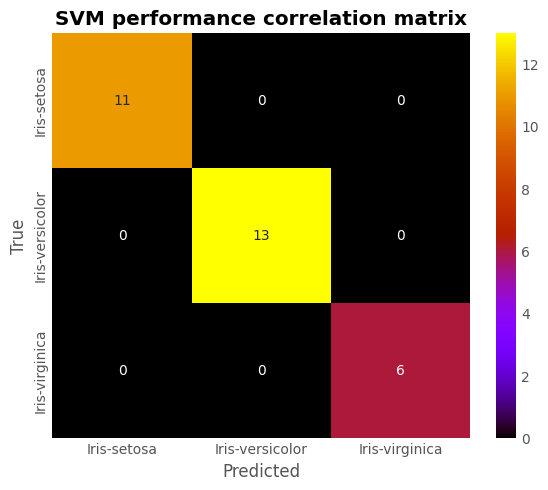

In [236]:
plt.figure(figsize=(6, 5))
sns.heatmap(svc[4], annot = True, fmt = 'd', cmap = 'gnuplot')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks((0.5, 1.5, 2.5), label_enc.classes_)
plt.yticks((0.5, 1.5, 2.5), label_enc.classes_)
plt.title("SVM performance correlation matrix", fontweight = 'bold');

## **Clearly, SVC with linear kernel is performing best!**